# 吴恩达机器学习课后习题

# #ex1 实现单变量线性回归，多变量线性回归

## 1.  Linear regression with one variable 单变量线性回归

### 1.1 Plotting the Data 数据图形化

In [91]:
import numpy as np #导入numpy库并另名为np，用于矩阵运算
import pandas as pd #导入pandas库并另名为pd，用于高效数据分析
import seaborn as sns #导入seaborn库并另名为sns，用于数据可视化分析
import matplotlib.pyplot as plt #导入matplotlib库并另名为plt，用于产品级2D图形绘制

data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据并赋予列名
#type(data)查看数据类型

pandas.core.frame.DataFrame

In [68]:
data.head()#看前五行#

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [69]:
data.info()#查看数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [70]:
data.shape#查看数据的大小

(97, 2)

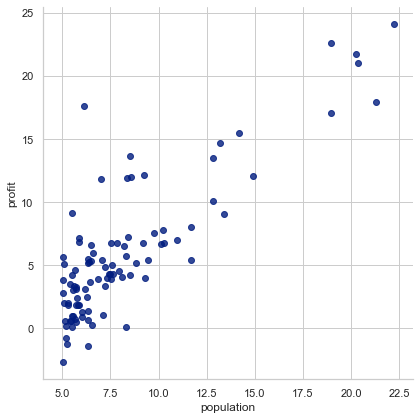

In [71]:
sns.lmplot('population', 'profit',data, size=6, fit_reg=False)
#sns.striplot('population', 'profit',data, size=6)
plt.show()

In [98]:
#X =np.array(data.iloc[:, -1])
#X =np.array(data.iloc[:, 1])
X= data.iloc[1] * data.iloc[2]
#根据标签的所在位置，从0开始计数，选取列

population     47.088265
profit        124.736792
dtype: float64

In [89]:
X[1]

9.1302